<a href="https://colab.research.google.com/github/ryogrid/ryogridJupyterNotebooks/blob/master/gaussian_process_regression_hidim_first_logic_syccess_0606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

最初に動かした  
"Fitting Gaussian Process Models in Python"  
https://blog.dominodatalab.com/fitting-gaussian-process-models-python/  
を、多次元入力に対応させてみる。

まずは、教師データを入力に z (3座標目)　を求めてプロットしてみる

In [0]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


In [0]:
def kernel_fn2(X, Y, params):
  X_T = X.T
  Y_T = Y.T
  return params[0] * np.exp( -0.5 * params[1] * np.dot((X - Y),(X_T - Y_T)))

In [0]:
def hidim_predict(x_pred_elem, x0_mesh, kernel, params, sigma, y0):
  #print(len(sigma))
  #k = [kernel(x_pred_elem, x0_mesh_elem, params) for x0_mesh_elem in x0_mesh]
  k = np.array([kernel(x_pred_elem, x0_mesh_elem, params) for x0_mesh_elem in x0_mesh])
  #print("k")
  #print(len(k))
  
  #print("sigma")
  #print(sigma.shape)
  #print(sigma)
  Sinv = np.linalg.inv(sigma)
  #print(Sinv)
  
  #print("predict")
  #print(k.shape)
  #print(Sinv.shape)
  #print(np.dot(k, Sinv).shape)
  #print(y0.T.shape)
  #print(k)
  #print(Sinv)
  #print(np.dot(k, Sinv))
  #print(y0.T)
  
  y_pred = np.dot(k, Sinv).dot(y0.T)
  sigma_new = kernel(x_pred_elem, x_pred_elem, params) - np.dot(k, Sinv).dot(k)
  return y_pred, sigma_new

In [0]:
x0 = np.linspace(-10, 10, 40)
eps = 0.001

x0_0_mesh, x0_1_mesh = np.meshgrid(x0, x0)
x0_mesh = np.c_[x0_0_mesh.ravel(), x0_1_mesh.ravel()]
#R = np.sqrt(x0_0_mesh**2 + x0_1_mesh**2) + eps;
R = np.sqrt(x0_mesh[:,0]**2 + x0_mesh[:,1]**2) + eps;
y0 = np.sin(R) / R + eps

#theta_hidim = [1.0, 1.0] #for kernel_fn2_bak
theta_hidim = [1, 40]

(40,)
y0
(1600,)
sigma_hidim
(1600, 1600)
x_pred_hidim[:,0]
(1600,)
x_pred_hidim
(1600, 2)
y_pred_hidim
(1600,)


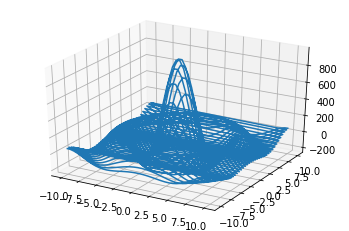

In [6]:
#sigma_hidim = kernel_fn2(x0, x0, theta_hidim)
#sigma_hidim = kernel_fn2(x0_mesh.T, x0_mesh.T, theta_hidim)
sigma_hidim = kernel_fn2(x0_mesh, x0_mesh, theta_hidim)

noise_mat = np.eye(1600) * eps
sigma_hidim += noise_mat
#x_pred_hidim = np.random.uniform(-10, 10, (300, 2))

#あえて教師データ(x0_mesh)と同じにしている
x_pred_hidim = np.c_[x0_0_mesh.ravel(), x0_1_mesh.ravel()]

print(x0.shape)
print("y0")
print(y0.shape)
print("sigma_hidim")
print(sigma_hidim.shape)
print("x_pred_hidim[:,0]")
print(x_pred_hidim[:,0].shape)
#predictions = [hidim_predict(x_pred_elem, x0, kernel_fn, theta_hidim, sigma_hidim, y0) for x_pred_elem in x_pred_hidim]
predictions = [hidim_predict(x_pred_elem, x0_mesh, kernel_fn2, theta_hidim, sigma_hidim, y0) for x_pred_elem in x_pred_hidim]
 
y_pred_hidim, sigmas = np.transpose(predictions)
print("x_pred_hidim")
print(x_pred_hidim.shape)
print("y_pred_hidim")
print(y_pred_hidim.shape)

X = np.array([x_pred_hidim[:,0].tolist()])
Y = np.array([x_pred_hidim[:,1].tolist()])
Z = np.array([y_pred_hidim.tolist()])
#print("x, y, z")
#print(X.shape)
#print(Y.shape)
#print(Z.shape)
#print(X)
#print(Y)
#print(Z)
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
#self.ax.set_zlim(0, width)


#plt.gca().invert_xaxis()
#ax.autoscale(enable=True)
#ax.scatter(X, Y, Z, depthshade=True)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X,Y,Z)
#ax.scatter(x, y, z)
plt.show()

#y_pred_hidim_mesh = np.reshape(y_predhidim, (200, 1))
#print(y_pred_hidim_mesh.shape)
#ax.plot_wireframe(x_pred_hidim_10_mesh, x_pred_hidim_11_mesh, y_pred_hidim_mesh)
#plt.show()

フィッティングした値でやってみる（教師データではなく）

In [0]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


In [0]:
def kernel_fn3(X, Y, params):
  X_T = X.T
  Y_T = Y.T
  return params[0] * np.exp( -0.5 * params[1] * np.dot((X - Y),(X_T - Y_T)))

In [0]:
def hidim_predict(x_pred_elem, x0_mesh, kernel, params, sigma, y0):
  #print(len(sigma))
  #k = [kernel(x_pred_elem, x0_mesh_elem, params) for x0_mesh_elem in x0_mesh]
  k = np.array([kernel(x_pred_elem, x0_mesh_elem, params) for x0_mesh_elem in x0_mesh])
  #print("k")
  #print(len(k))
  
  #print("sigma")
  #print(sigma.shape)
  #print(sigma)
  Sinv = np.linalg.inv(sigma)
  #print(Sinv)
  
  #print("predict")
  #print(k.shape)
  #print(Sinv.shape)
  #print(np.dot(k, Sinv).shape)
  #print(y0.T.shape)
  #print(k)
  #print(Sinv)
  #print(np.dot(k, Sinv))
  #print(y0.T)
  
  y_pred = np.dot(k, Sinv).dot(y0.T)
  sigma_new = kernel(x_pred_elem, x_pred_elem, params) - np.dot(k, Sinv).dot(k)
  return y_pred, sigma_new

In [0]:
x0 = np.linspace(-10, 10, 40)
eps = 0.001

x0_0_mesh, x0_1_mesh = np.meshgrid(x0, x0)
x0_mesh = np.c_[x0_0_mesh.ravel(), x0_1_mesh.ravel()]
#R = np.sqrt(x0_0_mesh**2 + x0_1_mesh**2) + eps;
R = np.sqrt(x0_mesh[:,0]**2 + x0_mesh[:,1]**2) + eps;
y0 = np.sin(R) / R + eps

#theta_hidim = [1.0, 1.0] #for kernel_fn2_bak
theta_hidim = [1, 40]

(40,)
y0
(1600,)
sigma_hidim
(1600, 1600)
x_pred_hidim[:,0]
(1600,)
x_pred_hidim
(1600, 2)
y_pred_hidim
(1600,)


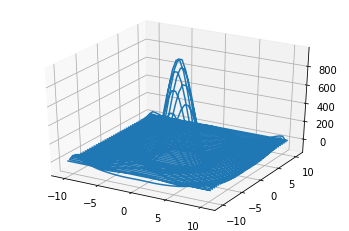

In [11]:
#sigma_hidim = kernel_fn2(x0, x0, theta_hidim)
#sigma_hidim = kernel_fn2(x0_mesh.T, x0_mesh.T, theta_hidim)
sigma_hidim = kernel_fn3(x0_mesh, x0_mesh, theta_hidim)


noise_mat = np.eye(1600) * eps
sigma_hidim += noise_mat
#x_pred_hidim = np.random.uniform(-10, 10, (300, 2))

#x1 = np.arange(-20, 20, 2)
x1 = np.linspace(-10.5, 10.5, 40)
x1_0_mesh, x1_1_mesh = np.meshgrid(x1, x1)
#あえて教師データ(x0_mesh)と同じにしている
x_pred_hidim = np.c_[x1_0_mesh.ravel(), x1_1_mesh.ravel()]

print(x0.shape)
print("y0")
print(y0.shape)
print("sigma_hidim")
print(sigma_hidim.shape)
print("x_pred_hidim[:,0]")
print(x_pred_hidim[:,0].shape)
#predictions = [hidim_predict(x_pred_elem, x0, kernel_fn, theta_hidim, sigma_hidim, y0) for x_pred_elem in x_pred_hidim]
predictions = [hidim_predict(x_pred_elem, x0_mesh, kernel_fn3, theta_hidim, sigma_hidim, y0) for x_pred_elem in x_pred_hidim]
 
y_pred_hidim, sigmas = np.transpose(predictions)
print("x_pred_hidim")
print(x_pred_hidim.shape)
print("y_pred_hidim")
print(y_pred_hidim.shape)

X = np.array([x_pred_hidim[:,0].tolist()])
Y = np.array([x_pred_hidim[:,1].tolist()])
Z = np.array([y_pred_hidim.tolist()])
#print("x, y, z")
#print(X.shape)
#print(Y.shape)
#print(Z.shape)
#print(X)
#print(Y)
#print(Z)
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
#self.ax.set_zlim(0, width)


#plt.gca().invert_xaxis()
#ax.autoscale(enable=True)
#ax.scatter(X, Y, Z, depthshade=True)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X,Y,Z)
#ax.scatter(x, y, z)
plt.show()

#y_pred_hidim_mesh = np.reshape(y_predhidim, (200, 1))
#print(y_pred_hidim_mesh.shape)
#ax.plot_wireframe(x_pred_hidim_10_mesh, x_pred_hidim_11_mesh, y_pred_hidim_mesh)
#plt.show()